<a href="https://colab.research.google.com/github/AnilOz/solubility_in_sc_CO2/blob/master/solubility_with_cosolvents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Adjustments

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
%cd /content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2

/content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2


### Importing Packages

In [35]:
from fugacity_coeff import fugacity_scf
from mixing_parameters import a_mix, a_PRK, alpha, b_mix, b_PRK, a_star, b_star, a_m_cosolvent, a_s_cosolvent, b_m_cosolvent, b_s_cosolvent
from Z_prk import Z_PRK
from P_sat import P_sat
from find_solubility import find_solubility_cosol, find_solubility

#from ANN.evaluate_model import evaluate_model, plot_predictions, model_predictions

In [17]:
import numpy as np 
import sympy as sp
from sympy import pi
from sympy.abc import i
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from IPython.display import display
from sympy.interactive import init_printing
init_printing(use_latex=True)
from sympy import pprint

### Inputs

#### Temperature and Pressure Inputs

In [21]:
P_num = np.arange(start=100000, stop=26000000, step=100000)
T_num = 313.15 # in Kelvins
R_num = 8.314 #Pa . m3 . mol-1 . K-1

In [22]:
k_num = np.array([[0,0.1,0],[0.1,0,0],[0,0,0]])
l_num = np.array([[0,0,0],[0,0,0],[0,0,0]])

#### Naphtalene Properties

In [23]:
from openpyxl import load_workbook, Workbook

wb1 = load_workbook('ExcelFiles/Joback_Method.xlsx', data_only=True)
ws1 = wb1.active
# T_c_naph = ws1['G36'].value # in Kelvin
# P_c_naph = ws1['G37'].value / 10 # in MPa
# V_c_naph = ws1['G38'].value # in cm³/mol
# w_naph = ws1['G40'].value


In [24]:
T_c_naph = 748.4
P_c_naph = 4050000
w_naph = 0.3020

In [25]:
v_solid_num = 128.6/10**(6) # cm^3/mol
A_num = 28.1249 #|
B_num = 6738.77 #| Antoine Constants
C_num = -35.818 #|

In [26]:
P_sat(A_num, B_num, C_num, T_num)

In [27]:
P_sub_num = P_sat(A_num, B_num, C_num, T_num)

#### CO2 Properties

In [28]:
T_c_co2 = 304.25
P_c_co2 = 7377300 # Pa
w_co2 = 0.225

### Ethanol Properties

In [29]:
T_c_eth = 516.2
P_c_eth= 6140000 # Pa
w_eth= 0.635

### Toluene Properties

In [30]:
T_c_tol = 591.7
P_c_tol= 4112780 # Pa
w_tol= 0.2570

### n-Heptane Properties

In [31]:
T_c_hep = 540.2
P_c_hep= 2740000 # Pa
w_hep= 0.35

### Calculations

#### Mixing Parameters

In [32]:
alpha_co2 = alpha(w_co2, T_num, T_c_co2)
alpha_naph = alpha(w_naph, T_num, T_c_naph)
alpha_eth = alpha(w_eth, T_num, T_c_eth)
alpha_tol = alpha(w_tol, T_num, T_c_tol)
alpha_hep = alpha(w_hep, T_num, T_c_hep)

a_PRK_CO2 = a_PRK(P_c_co2, T_c_co2, R_num) * alpha_co2
a_PRK_naph = a_PRK(P_c_naph, T_c_naph, R_num) * alpha_naph
a_PRK_eth = a_PRK(P_c_eth, T_c_eth, R_num) * alpha_eth
a_PRK_tol = a_PRK(P_c_tol, T_c_tol, R_num) * alpha_tol
a_PRK_hep = a_PRK(P_c_hep, T_c_hep, R_num) * alpha_hep


b_PRK_CO2 = b_PRK(P_c_co2, T_c_co2, R_num)
b_PRK_naph = b_PRK(P_c_naph, T_c_naph, R_num)
b_PRK_eth = b_PRK(P_c_eth, T_c_eth, R_num)
b_PRK_tol = b_PRK(P_c_tol, T_c_tol, R_num)
b_PRK_hep = b_PRK(P_c_hep, T_c_hep, R_num)

# print(alpha_co2, alpha_naph, a_PRK_CO2, a_PRK_naph, b_PRK_CO2, b_PRK_naph)

In [33]:
find_solubility_cosol(0.05, v_solid_num, 5900000, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, a_PRK_hep, b_PRK_CO2, b_PRK_naph, b_PRK_hep, k_num, l_num, disp = True)

### Naphtalene Solubility Without Colsolvent

In [34]:
counter = 0
y_solubility = []
for i in P_num:
    y_final = find_solubility(v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, b_PRK_CO2, b_PRK_naph, k_num, l_num)
    y_solubility.append(y_final)
    counter += 1
    print(counter)

NameError: ignored

### Naphtalene solubility in scCO2 with a cosolvent of 5% ethanol

In [ ]:
counter = 0
y_solubility_eth = []
for i in P_num:
    y_final = find_solubility_cosol(0.05, v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, a_PRK_eth, b_PRK_CO2, b_PRK_naph, b_PRK_eth, k_num, l_num)
    y_solubility_eth.append(y_final)
    counter += 1
    print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


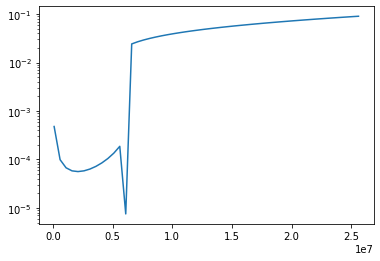

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility_eth)

In [ ]:
df = pd.DataFrame(y_solubility_eth)
df.to_excel('y_naph_PRK_coethanol.xlsx', index=False)

### Naphtalene solubility in scCO2 with a cosolvent of 5% n_heptane 

In [ ]:
counter = 0
y_solubility_hep = []
for i in P_num:
    y_final = find_solubility_cosol(0.05, v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, a_PRK_hep, b_PRK_CO2, b_PRK_naph, b_PRK_hep, k_num, l_num)
    y_solubility_hep.append(y_final)
    counter += 1
    print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


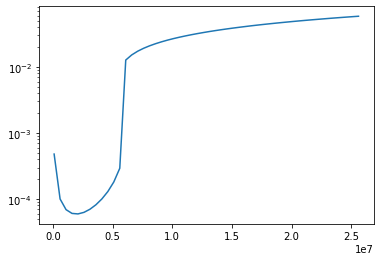

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility_hep)

In [ ]:
df = pd.DataFrame(y_solubility_hep)
df.to_excel('y_naph_PRK_co_nheptane.xlsx', index=False)

### Compare solubilities obtained by ANN model and PRK EOS

In [ ]:
df1 = pd.read_excel('y_naph_PRK_coethanol.xlsx')

In [ ]:
y_naph_PRK = df1[0].values

In [ ]:
y_ANN = model_predictions('ANN\solubility_model.csv')

In [ ]:
evaluate_model(y_ANN, y_naph_PRK)

In [ ]:
plot_predictions(y_ANN, y_naph_PRK)

### Compare Results

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK.xlsx')
P_num = df[1]
y_naph = df[0] 

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK_coethanol.xlsx')
P_eth = df[1]
y_naph_eth = df[0]  

In [ ]:
df = pd.read_excel('ExcelFiles\y_naph_PRK_co_nheptane.xlsx')
P_hep = df[1]
y_naph_hep = df[0] 

In [ ]:
    # Create figure and add axes object
fig = plt.figure()

mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(0.1, 20)
ax.plot(P_eth, y_naph_eth, color='red', label='$ethanol$')
ax.plot(P_hep, y_naph_hep, color='b', label='$n-heptane$')
# ax.plot(P_num, y_naph)

plt.xlabel('$P (MPa)$')
plt.ylabel('$log(y_{i})$')
plt.legend(loc='lower right', prop={'size': 15})
plt.yscale("log")
plt.show()